In [6]:
import pandas as pd

In [7]:
df = pd.read_excel('/content/Sample - Superstore.xls', engine='xlrd')


In [8]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [10]:
#Qual Cidade com Maior Valor de Venda de Produtos da Categoria office supplies?

import pandas as pd


# Filter for 'Office Supplies' category
office_supplies = df[df['Category'] == 'Office Supplies']

# Group by city and sum sales
city_sales = office_supplies.groupby('City')['Sales'].sum()

# Find the city with the maximum sales
max_sales_city = city_sales.idxmax()

print(f"A cidade com maior valor de venda de produtos da categoria 'Office Supplies' é: {max_sales_city}")

A cidade com maior valor de venda de produtos da categoria 'Office Supplies' é: New York City


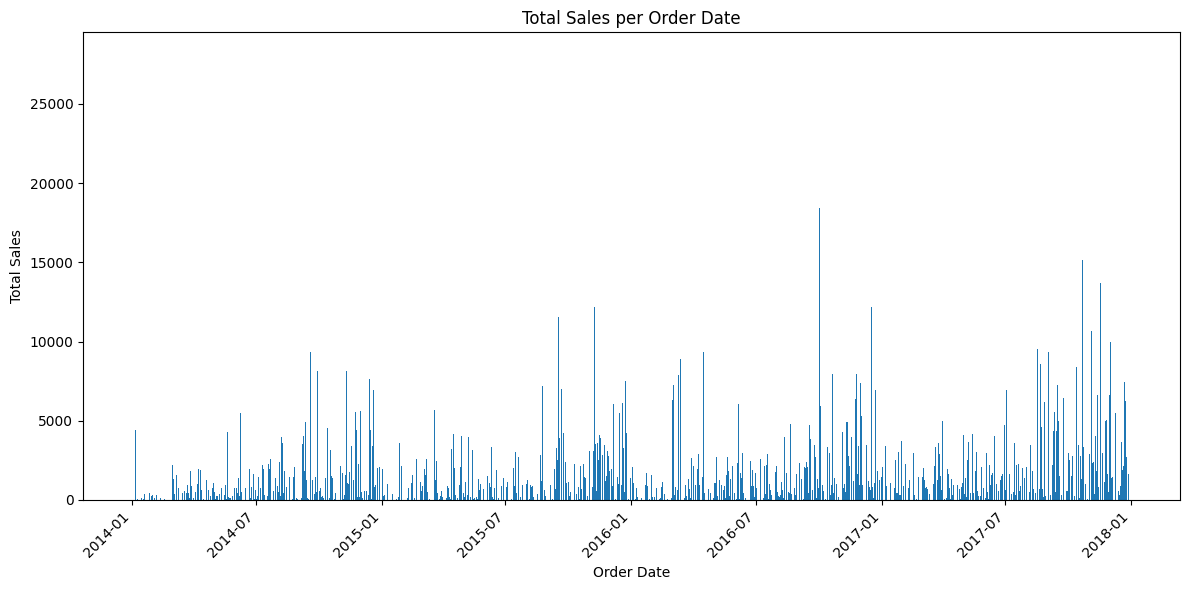

In [11]:
#Qual o Total de Vendas Por Dados do Pedido?

import pandas as pd
import matplotlib.pyplot as plt

# Load the data (assuming the file is in the correct location)
df = pd.read_excel('/content/Sample - Superstore.xls', engine='xlrd')

# Group by 'Order Date' and sum 'Sales'
sales_by_order_date = df.groupby('Order Date')['Sales'].sum()

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(sales_by_order_date.index, sales_by_order_date.values)
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.title('Total Sales per Order Date')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

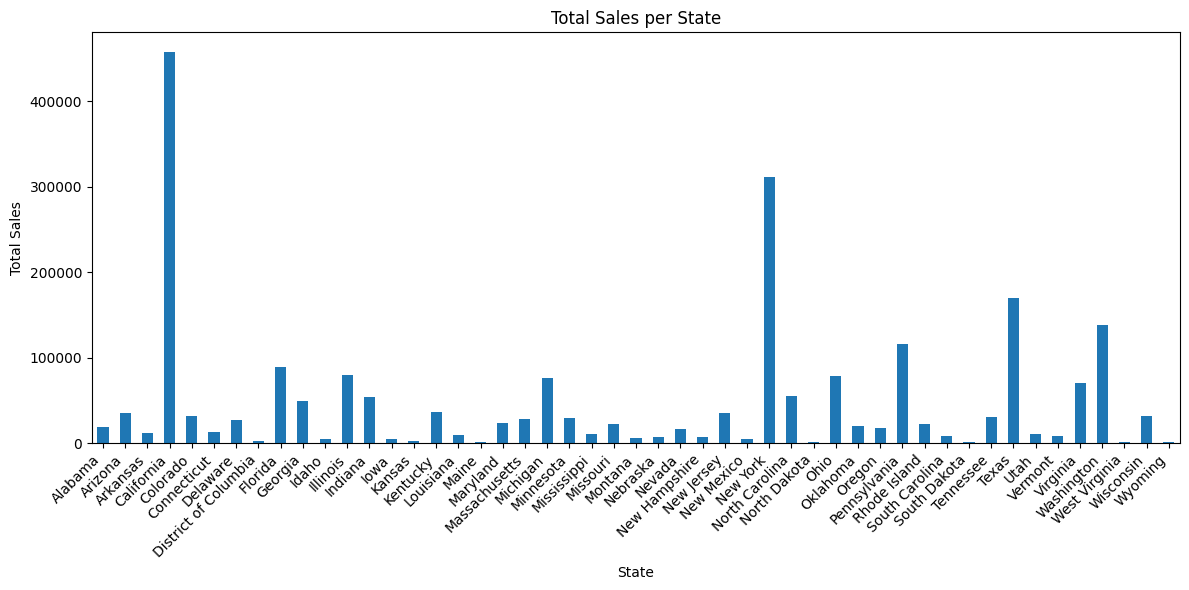

In [12]:
# Qual o total de Vendas por estado?

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel('/content/Sample - Superstore.xls', engine='xlrd')

# Group by state and sum sales
sales_by_state = df.groupby('State')['Sales'].sum()

# Create the bar plot
plt.figure(figsize=(12, 6))
sales_by_state.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.title('Total Sales per State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

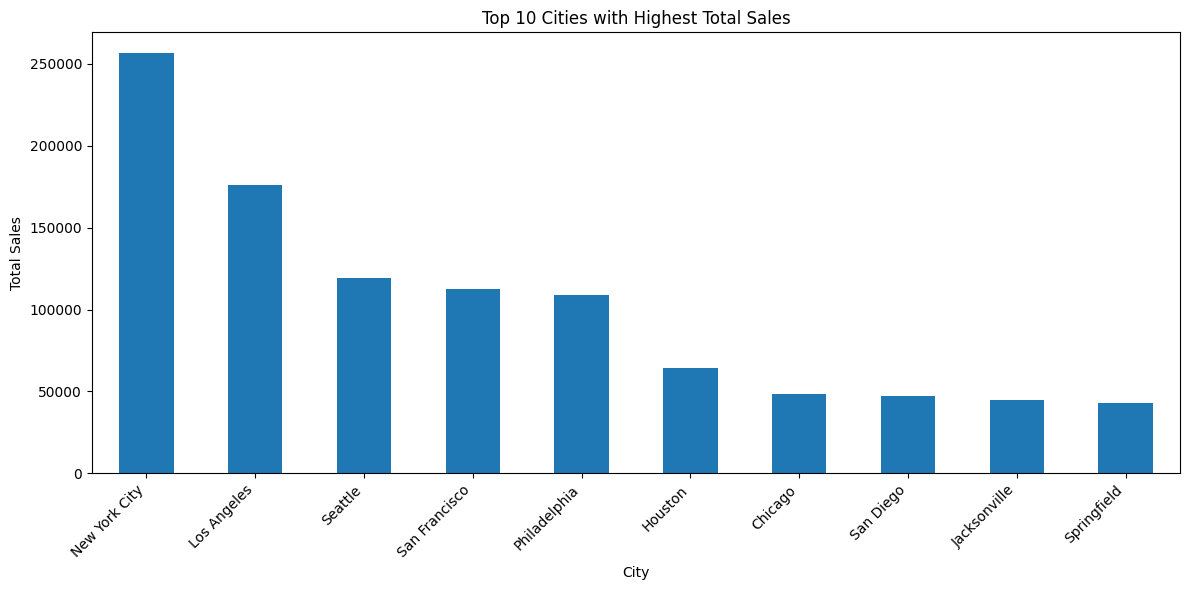

In [13]:
# Quais São as 10 Cidades com Maior Total de Vendas?

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel('/content/Sample - Superstore.xls', engine='xlrd')

# Group by city and sum sales
city_sales = df.groupby('City')['Sales'].sum()

# Sort cities by total sales in descending order and get the top 10
top_10_cities = city_sales.sort_values(ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(12, 6))
top_10_cities.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title('Top 10 Cities with Highest Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

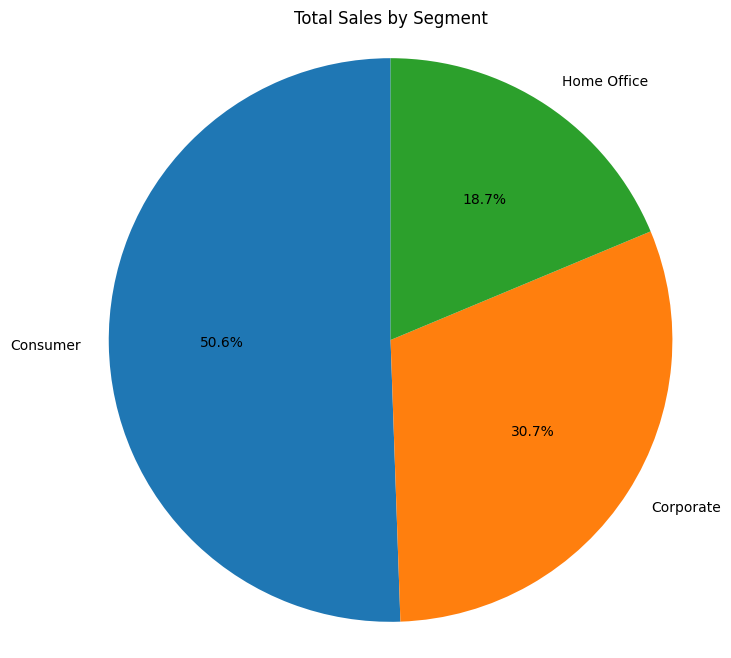

In [14]:
#Qual Segmento Teve o Maior Total de Vendas?

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel('/content/Sample - Superstore.xls', engine='xlrd')

# Group by segment and sum sales
segment_sales = df.groupby('Segment')['Sales'].sum()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(segment_sales, labels=segment_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Sales by Segment')
plt.axis('equal')
plt.show()

In [15]:
#Qual o Total de Vendas Por Segmento e Por Ano?

# Load the data
df = pd.read_excel('/content/Sample - Superstore.xls', engine='xlrd')

# Convert 'Order Date' to datetime objects
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract the year from the 'Order Date'
df['Year'] = df['Order Date'].dt.year

# Group by segment and year, then sum sales
sales_by_segment_year = df.groupby(['Segment', 'Year'])['Sales'].sum()

sales_by_segment_year

Segment      Year
Consumer     2014    266096.8126
             2015    266535.9333
             2016    296863.8992
             2017    331904.6999
Corporate    2014    128434.8737
             2015    128757.3069
             2016    207106.3618
             2017    241847.8244
Home Office  2014     89715.8118
             2015     75239.2688
             2016    105235.3370
             2017    159462.7309
Name: Sales, dtype: float64

In [20]:
"""Os gestores da empresa estão considerando diferentes faixas de descontos e gostaria de fazer uma simulação com base na regra abaixo:
Se o Valor_Venda por maior que 1000 recebe 15% de desconto.
Se o Valor_Venda por menor que 1000 recebe 10% de desconto.
Quantas Vendas Receberiam 15% deDesconto?"""

import pandas as pd

# Load the data
df = pd.read_excel('/content/Sample - Superstore.xls', engine='xlrd')

# Apply discount rules
def apply_discount(sales):
  if sales > 1000:
    return 0.15
  else:
    return 0.10

df['Discount'] = df['Sales'].apply(apply_discount)

# Count the number of sales with 15% discount
sales_15_percent = len(df[df['Discount'] == 0.15])

print(f"Number of sales that would receive a 15% discount: {sales_15_percent}")

Number of sales that would receive a 15% discount: 468


In [17]:
#Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

# Load the data
df = pd.read_excel('/content/Sample - Superstore.xls', engine='xlrd')

# Apply discount rules
def apply_discount(sales):
  if sales > 1000:
    return 0.15
  else:
    return 0.10

df['Discount'] = df['Sales'].apply(apply_discount)

# Calculate sales after discount
df['SalesAfterDiscount'] = df.apply(lambda row: row['Sales'] * (1 - row['Discount']), axis=1)

# Calculate the average sales before and after discount
average_sales_before = df['Sales'].mean()
average_sales_after = df['SalesAfterDiscount'].mean()

print(f"Average sales before discount: {average_sales_before}")
print(f"Average sales after discount: {average_sales_after}")

Average sales before discount: 229.85800083049833
Average sales after discount: 201.91838305883533


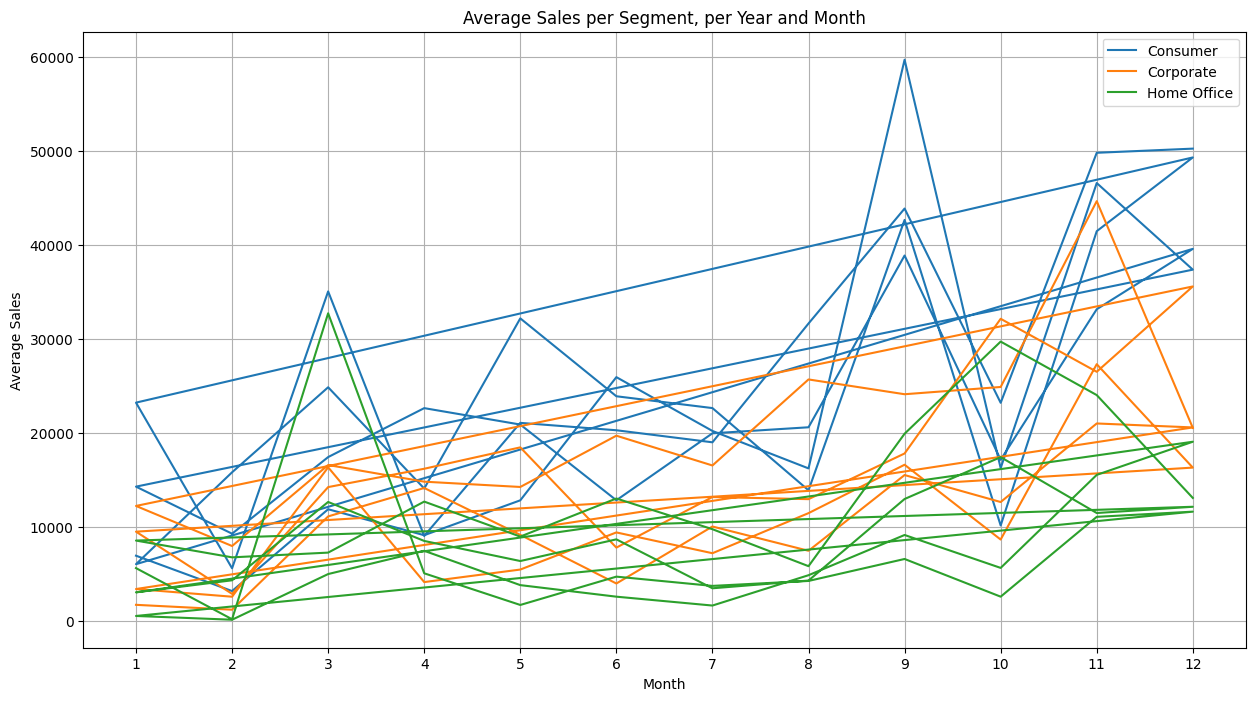

In [18]:
#Qual a Média de Vendas Por Segmento, Por Ano e Por Mês?

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel('/content/Sample - Superstore.xls', engine='xlrd')

# Convert 'Order Date' to datetime objects
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract year and month
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Group by segment, year, and month, then sum sales
sales_by_segment_year_month = df.groupby(['Segment', 'Year', 'Month'])['Sales'].sum().reset_index()

# Create line plots for each segment
plt.figure(figsize=(15, 8))

for segment in sales_by_segment_year_month['Segment'].unique():
    segment_data = sales_by_segment_year_month[sales_by_segment_year_month['Segment'] == segment]
    plt.plot(segment_data['Month'], segment_data['Sales'], label=segment)

plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Average Sales per Segment, per Year and Month')
plt.legend()
plt.xticks(sales_by_segment_year_month['Month'].unique())  # Set x-axis ticks to months
plt.grid(True)
plt.show()

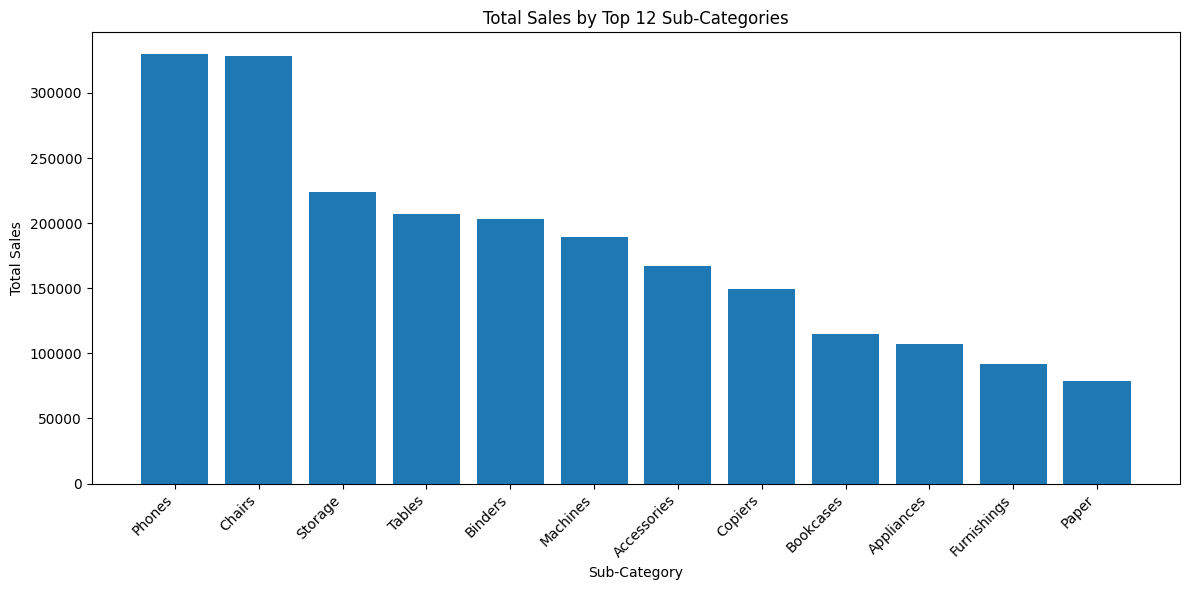

In [19]:
#Qual o Total de Vendas Por Categoria e Subcategoria, Considerando Apenas como Top 12 Subcategorias?

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel('/content/Sample - Superstore.xls', engine='xlrd')

# Group by category and sub-category, then sum sales
sales_by_category_subcategory = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

# Sort by sales in descending order and get the top 12 sub-categories
top_12_subcategories = sales_by_category_subcategory.sort_values(by='Sales', ascending=False).head(12)

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_12_subcategories['Sub-Category'], top_12_subcategories['Sales'])
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Top 12 Sub-Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()